In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

df = pd.read_csv("Data/bookdata2.csv")

In [10]:
print("Data shape:", df.shape)

Data shape: (1149622, 4)


In [11]:
print("Null values per column:\n", df.isnull().sum())

Null values per column:
 User-ID         0
ISBN            0
Rating          0
Title      118601
dtype: int64


In [ ]:
# حذف سطرهایی که مقدار Title در آن‌ها null است
df = df.dropna(subset=["Title"])

In [ ]:
# حذف رای‌های تکراری کاربران برای یک کتاب، نگه داشتن آخرین رای
df = df.drop_duplicates(subset=["User-ID", "ISBN"], keep="last")

In [ ]:
user_counts = df["User-ID"].value_counts()
book_counts = df["ISBN"].value_counts()
min_user_ratings = 15
min_book_ratings = 15


qualified_users = user_counts[user_counts >= min_user_ratings].index
df_filtered = df[df["User-ID"].isin(qualified_users)]

book_counts_after_user_filter = df_filtered["ISBN"].value_counts()
qualified_books = book_counts_after_user_filter[
    book_counts_after_user_filter >= min_book_ratings
].index
df_filtered = df_filtered[df_filtered["ISBN"].isin(qualified_books)]

In [18]:
df_filtered.shape

(311831, 4)

In [ ]:
n_users = df_filtered["User-ID"].nunique()
print(f"تعداد کاربران یکتا: {n_users}")

n_items = df_filtered["ISBN"].nunique()
print(f"تعداد کتاب‌های یکتا (آیتم‌ها): {n_items}")

تعداد کاربران یکتا: 8256
تعداد کتاب‌های یکتا (آیتم‌ها): 8153


In [ ]:
user_rating_counts = df_filtered.groupby("User-ID")["Rating"].count()
print("آمار توصیفی تعداد رأی به ازای هر کاربر:")
print(user_rating_counts.describe())

آمار توصیفی تعداد رأی به ازای هر کاربر:
count    8256.000000
mean       37.770228
std        90.109312
min         1.000000
25%         8.000000
50%        14.000000
75%        32.000000
max      3500.000000
Name: Rating, dtype: float64


In [ ]:
item_rating_counts = df_filtered.groupby("ISBN")["Rating"].count()
print("آمار توصیفی تعداد رأی به ازای هر کتاب:")
print(item_rating_counts.describe())

آمار توصیفی تعداد رأی به ازای هر کتاب:
count    8153.000000
mean       38.247394
std        42.281857
min        15.000000
25%        18.000000
50%        25.000000
75%        41.000000
max      1226.000000
Name: Rating, dtype: float64


In [ ]:
most_popular_items = item_rating_counts.sort_values(ascending=False).head(10)

df_titles = df_filtered[["ISBN", "Title"]].drop_duplicates().set_index("ISBN")
most_popular_items_with_titles = df_titles.loc[most_popular_items.index]
most_popular_items_with_titles["rating_counts"] = most_popular_items

print("\n۱۰ کتاب محبوب‌تر:")
print(most_popular_items_with_titles)
print("\n" + "=" * 50 + "\n")


۱۰ کتاب محبوب‌تر:
                                                      Title  rating_counts
ISBN                                                                      
0971880107                                      Wild Animus           1226
0316666343                        The Lovely Bones: A Novel            780
0385504209                                The Da Vinci Code            578
0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel            491
0312195516              The Red Tent (Bestselling Backlist)            452
0142001740                          The Secret Life of Bees            424
067976402X                           Snow Falling on Cedars            420
044021145X                                         The Firm            417
0440214041                                The Pelican Brief            403
0671027360                                  Angels & Demons            402




In [ ]:
# 10 books with the most mean rating
book_stats = (
    df_filtered.groupby(["ISBN", "Title"])["Rating"].agg(["mean", "size"]).reset_index()
)

book_stats.columns = ["ISBN", "Title", "rating_mean", "rating_count"]
top_10_books = book_stats.sort_values(by="rating_mean", ascending=False).head(10)

# نمایش نتیجه
top_10_books.head(10)

,ISBN,Title,rating_mean,rating_count
117,0060256672,Where the Sidewalk Ends : Poems and Drawings,7.407407,27
5303,0553274325,Johnny Got His Gun,7.277778,18
538,0064440508,A Kiss for Little Bear,7.187500,16
2716,0394800389,Fox in Socks (I Can Read It All by Myself Begi...,7.111111,18
2866,0399151451,Bad Business,6.882353,17
8140,3551551677,Harry Potter und der Stein der Weisen,6.812500,16
2727,0395177111,The Hobbit (Leatherette Collector's Edition),6.750000,20
115,0060248025,Falling Up,6.705882,34
5223,0553251481,Jitterbug Perfume,6.625000,16
1089,0316103098,Bloom County Babylon : Five Years of Basic Nau...,6.625000,16


<Axes: >

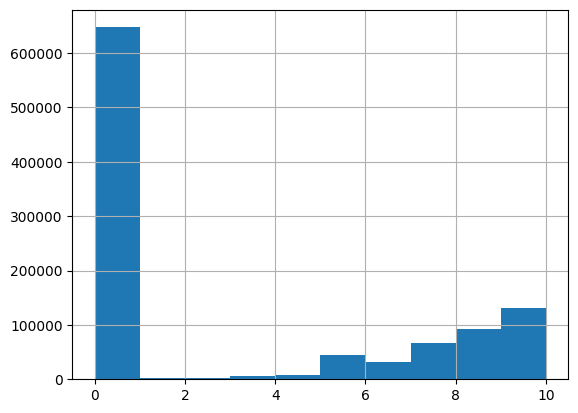

In [ ]:
df["Rating"].hist()

In [ ]:
user_all_data = df_filtered[df_filtered["User-ID"] == 11676]
print(f"تعداد کل امتیازات کاربر {11676}: {len(user_all_data)} عدد")

ratings_10 = user_all_data[user_all_data["Rating"] == 10]

num_10_to_sample = min(7, len(ratings_10))
test_samples_10 = ratings_10.sample(n=num_10_to_sample, random_state=42)

ratings_9 = user_all_data[user_all_data["Rating"] == 9]
num_9_to_sample = min(3, len(ratings_9))
test_samples_9 = ratings_9.sample(n=num_9_to_sample, random_state=42)


already_selected_indices = test_samples_10.index.union(test_samples_9.index)
remaining_data = user_all_data.drop(already_selected_indices)
num_random_to_sample = 20 - len(test_samples_10) - len(test_samples_9)
num_random_to_sample = min(num_random_to_sample, len(remaining_data))

test_samples_random = remaining_data.sample(n=num_random_to_sample, random_state=42)

df_test = pd.concat([test_samples_10, test_samples_9, test_samples_random])

df_filtered = df_filtered.drop(df_test.index)

تعداد کل امتیازات کاربر 11676: 3500 عدد


In [26]:
df_test.head(20)

,User-ID,ISBN,Rating,Title
48525,11676,038081093X,10,Excavation
51968,11676,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...
50990,11676,0515103969,10,The Endearment
47193,11676,0316693324,10,When the Wind Blows
47660,11676,0345413881,10,Dr. Death (Alex Delaware Novels (Paperback))
54627,11676,082177462X,10,Kentucky Sunrise
47668,11676,0345417623,10,Timeline
50209,11676,0446611808,9,Envy
51982,11676,0590406191,9,The Trumpet of the Swan
46238,11676,0140099832,9,Lake Wobegon Days


In [ ]:
user_item_matrix = df_filtered.pivot_table(
    index="User-ID", columns="ISBN", values="Rating", fill_value=0
)

# نمایش ابعاد و نمونه‌ای از ماتریس
print(user_item_matrix.shape)
user_item_matrix.head(15)

(8256, 8153)


ISBN,000649840X,0006547834,0006550576,0006550789,0007110928,0007141076,0007154615,000716226X,0020125305,0020198817,...,3746614007,379200027X,3822860867,8408043641,842046435X,8433925180,8478884459,8495501198,8495618605,950491036X
User-ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# محاسبه تعداد کتاب‌هایی که هر کاربر رای داده (مقدار غیر صفر در هر ردیف)
user_activity = (user_item_matrix != 0).sum(axis=1)

# مرتب‌سازی بر اساس تعداد رأی‌ها و نمایش ۱۵ مورد اول
top_15_users = user_activity.sort_values(ascending=False).head(15)
print("آیدی ۱۵ کاربر فعال‌تر به همراه تعداد رأی ثبت‌شده:")
print(top_15_users)

آیدی ۱۵ کاربر فعال‌تر به همراه تعداد رأی ثبت‌شده:
User-ID
11676     2238
98391      560
153662     442
16795      387
114368     361
95359      315
104636     306
123883     255
158295     241
35859      232
135149     224
60244      216
204864     215
235105     205
78973      174
dtype: int64


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# محاسبه شباهت کسینوسی بین کاربران
user_similarity_cosine = cosine_similarity(user_item_matrix)

# تبدیل نتیجه به یک DataFrame با اندیس‌ها و ستون‌های آیدی کاربران
user_similarity_cosine = pd.DataFrame(
    user_similarity_cosine, index=user_item_matrix.index, columns=user_item_matrix.index
)

# نمایش شکل ماتریس شباهت
print("User-User Similarity Matrix (cosine) shape:", user_similarity_cosine.shape)

# نمایش بخشی از ماتریس
user_similarity_cosine.head(10)

User-User Similarity Matrix (cosine) shape: (8256, 8256)


User-ID,8,242,243,254,383,388,408,446,487,503,...,278346,278356,278390,278418,278535,278563,278582,278633,278843,278851
User-ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.041296,0.000000,0.0
254,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.140629,0.000000,0.0,0.0,0.0,0.0,0.000000,0.066549,0.0
383,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
388,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.147482,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [ ]:
# تبدیل آرایه شباهت به DataFrame با اندیس‌ها و ستون‌های آیدی کاربران
user_similarity_df_cosine = pd.DataFrame(
    user_similarity_cosine, index=user_item_matrix.index, columns=user_item_matrix.index
)

# نمایش پیام موفقیت و نمونه‌ای از داده‌ها
print("\nماتریس شباهت کاربر-کاربر با موفقیت محاسبه شد.")
print("شکل ماتریس شباهت:", user_similarity_df_cosine.shape)
print("نمونه‌ای از ماتریس شباهت:")
user_similarity_df_cosine.head()


ماتریس شباهت کاربر-کاربر با موفقیت محاسبه شد.
شکل ماتریس شباهت: (8256, 8256)
نمونه‌ای از ماتریس شباهت:


User-ID,8,242,243,254,383,388,408,446,487,503,...,278346,278356,278390,278418,278535,278563,278582,278633,278843,278851
User-ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.041296,0.000000,0.0
254,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.140629,0.0,0.0,0.0,0.0,0.0,0.000000,0.066549,0.0
383,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [ ]:
def recommender_system(
    user_id, user_item_matrix, user_similarity_df, k=7, n_recommendations=20
):
    # اگر کاربر داخل داده‌ها نیست
    if user_id not in user_item_matrix.index:
        print(f"User {user_id} not found.")
        return pd.DataFrame(columns=["book", "score"])

    # امتیازات این کاربر
    user_ratings = user_item_matrix.loc[user_id]

    # کتاب‌هایی که کاربر هنوز امتیاز نداده (یعنی مقدارش صفره)
    unrated_books = user_ratings[user_ratings == 0]

    # کاربران مشابه (بجز خودش)، به ترتیب شباهت
    similar_users = (
        user_similarity_df[user_id].drop(user_id).sort_values(ascending=False).head(k)
    )

    # امتیاز تخمینی برای کتاب‌هایی که نمره نداده
    estimated_scores = {}
    for isbn in unrated_books.index:
        weighted_sum = 0
        sim_sum = 0
        for sim_user_id, similarity in similar_users.items():
            neighbor_rating = user_item_matrix.at[sim_user_id, isbn]
            if neighbor_rating > 0:
                weighted_sum += similarity * neighbor_rating
                sim_sum += similarity
        if sim_sum > 0:
            estimated_score = weighted_sum / sim_sum
            estimated_scores[isbn] = estimated_score

    # ساخت دیتافریم پیشنهادی
    recommendation_df = pd.DataFrame(
        list(estimated_scores.items()), columns=["ISBN", "score"]
    )

    # اتصال نام کتاب‌ها
    titles = df_filtered[["ISBN", "Title"]].drop_duplicates().set_index("ISBN")
    recommendation_df = recommendation_df.join(titles, on="ISBN")

    # فقط ستون‌های book و score، مرتب شده بر اساس امتیاز
    recommendation_df = recommendation_df[["Title", "score"]].rename(
        columns={"Title": "book"}
    )
    recommendation_df = recommendation_df.sort_values(by="score", ascending=False).head(
        n_recommendations
    )

    return recommendation_df.reset_index(drop=True)

In [ ]:
recommendations_23902 = recommender_system(
    23902, user_item_matrix, user_similarity_df_cosine
)
recommendations_23902.to_csv("23902.csv", index=False)

In [ ]:
recommendations_197659 = recommender_system(
    197659, user_item_matrix, user_similarity_df_cosine
)
recommendations_197659.to_csv("197659.csv", index=False)

In [ ]:
def predict_rating(
    input_df,
    target_user_id,
    user_item_matrix,
    user_similarity_df,
    k_neighbors=7,
    default_strategy="mean",  # یا 'zero' یا 'fixed'
):
    results = []

    if target_user_id not in user_item_matrix.index:
        print(f"User {target_user_id} not found.")
        return pd.DataFrame(columns=["bookId", "score"])

    # امتیازات کاربر هدف
    target_user_ratings = user_item_matrix.loc[target_user_id]

    # کاربران مشابه (به جز خودش)، به ترتیب شباهت
    similar_users = (
        user_similarity_df[target_user_id]
        .drop(target_user_id)
        .sort_values(ascending=False)
        .head(k_neighbors)
    )

    # میانگین امتیازات کاربر (در صورت نیاز)
    user_mean_rating = target_user_ratings[target_user_ratings > 0].mean()
    if np.isnan(user_mean_rating):
        user_mean_rating = 5  # اگر هیچ رأیی نداشت، مقدار وسط

    for book_id in input_df["bookId"]:
        weighted_sum = 0
        sim_sum = 0

        for neighbor_id, similarity in similar_users.items():
            neighbor_rating = (
                user_item_matrix.at[neighbor_id, book_id]
                if book_id in user_item_matrix.columns
                else 0
            )
            if neighbor_rating > 0:
                weighted_sum += similarity * neighbor_rating
                sim_sum += similarity

        if sim_sum > 0:
            estimated_rating = weighted_sum / sim_sum
        else:
            # اگر امتیاز قابل تخمین نبود:
            if default_strategy == "mean":
                estimated_rating = user_mean_rating
            elif default_strategy == "fixed":
                estimated_rating = 5
            else:
                estimated_rating = 0

        results.append((book_id, estimated_rating))

    return pd.DataFrame(results, columns=["bookId", "score"])

In [ ]:
input_df = df_test[["ISBN"]].rename(columns={"ISBN": "bookId"})

predicted_ratings = predict_rating(
    input_df=input_df,
    target_user_id=11676,
    user_item_matrix=user_item_matrix,
    user_similarity_df=user_similarity_df_cosine,
    k_neighbors=7,
)

predicted_ratings.head()

,bookId,score
0,038081093X,7.560322
1,059035342X,10.000000
2,0515103969,10.000000
3,0316693324,7.560322
4,0345413881,7.560322


In [ ]:
# آماده‌سازی داده تست برای ورودی تابع پیش‌بینی
test_input_df = df_test[["ISBN"]].rename(columns={"ISBN": "bookId"})

# پیش‌بینی امتیازات
predicted_df = predict_rating(
    input_df=test_input_df,
    target_user_id=11676,
    user_item_matrix=user_item_matrix,
    user_similarity_df=user_similarity_df_cosine,
    k_neighbors=10,
)

from sklearn.metrics import mean_absolute_error


def calculate_mae(predictions_df, actuals_df):
    merged_df = pd.merge(predictions_df, actuals_df, left_on="bookId", right_on="ISBN")

    if merged_df.empty:
        print("هیچ آیتم مشترکی برای محاسبه خطا یافت نشد.")
        return 0.0

    # محاسبه MAE بین ستون امتیاز واقعی و پیش‌بینی شده
    mae = mean_absolute_error(merged_df["Rating"], merged_df["score"])

    return mae


model_mae = calculate_mae(predicted_df, df_test)
print(f"میانگین خطای مطلق (MAE) مدل شما برای کاربر 11676: {model_mae:.4f}")

میانگین خطای مطلق (MAE) مدل شما برای کاربر 11676: 2.2836


In [ ]:
# Rename 'ISBN' column to 'bookId' for compatibility with predict_rating
test_input_df = df_test[["ISBN"]].rename(columns={"ISBN": "bookId"})

predicted_df = predict_rating(
    test_input_df, 11676, user_item_matrix, user_similarity_df_cosine, k_neighbors=10
)

model_mae = calculate_mae(predicted_df, df_test)

print(f"میانگین خطای مطلق (MAE) مدل شما: {model_mae:.4f}")

میانگین خطای مطلق (MAE) مدل شما: 2.2836


In [ ]:
# خواندن فایل تست
test_158295 = pd.read_csv("Data/test_158295.csv")  # فرض بر این است که ستون ISBN دارد

# آماده‌سازی ورودی
input_158295 = test_158295.rename(columns={"ISBN": "bookId"})

# پیش‌بینی
predicted_158295 = predict_rating(
    input_df=input_158295,
    target_user_id=158295,
    user_item_matrix=user_item_matrix,
    user_similarity_df=user_similarity_df_cosine,
    k_neighbors=10,
)

# تغییر نام ستون bookId به ISBN برای سازگاری با سیستم داوری
predicted_158295 = predicted_158295.rename(columns={"bookId": "ISBN"})

# ذخیره در قالب درست
predicted_158295.to_csv("158295.csv", index=False)

In [ ]:
# خواندن فایل تست
test_95359 = pd.read_csv("Data/test_95359.csv")  # فرض بر این است که ستون ISBN دارد

# آماده‌سازی ورودی
input_95359 = test_95359.rename(columns={"ISBN": "bookId"})

# پیش‌بینی
predicted_95359 = predict_rating(
    input_df=input_95359,
    target_user_id=95359,
    user_item_matrix=user_item_matrix,
    user_similarity_df=user_similarity_df_cosine,
    k_neighbors=10,
)

predicted_95359 = predicted_95359.rename(columns={"bookId": "ISBN"})

predicted_95359.to_csv("95359.csv", index=False)